In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy
from scipy import signal

In [2]:
def DNA_gen(N0, N, Pmut, g, M = 0):
    print('Pmut: ', Pmut)
    DNA = list(np.random.randint(0,4, size = N0)) 
    limit = [0,g/2,g,1/2+g/2,1]
    base = [1,3,0,2]
    print(limit)
    while (len(DNA) != N):
        j = np.random.randint(0,len(DNA))
        nuc = DNA[j]
        p = np.random.random()
        if(p>Pmut):
            DNA.insert(j+1, nuc)
        else:
            pg = np.random.random()
            v = np.array(limit)-pg
            v[v<0] = 1
            idx = np.argmin(v)
            DNA[j] = base[idx-1]
    count = 0
    while(count != M):
        j = np.random.randint(0,len(DNA))
        pg = np.random.random()
        v = np.array(limit)-pg
        v[v<0] = 1
        idx = np.argmin(v)
        DNA[j] = base[idx-1]
        count += 1

    return DNA

### Calibration - correlation exponent

In [3]:
N = 1000000
N0 = 1
coeff = [0.10,0.12,0.15,0.17,0.20,0.25,0.30,0.40]
subjects = [DNA_gen(N0,N,coeff[i],0.5) for i in range(len(coeff))]
print(np.array(subjects).shape)

Pmut:  0.1
[0, 0.25, 0.5, 0.75, 1]
Pmut:  0.12
[0, 0.25, 0.5, 0.75, 1]
Pmut:  0.15
[0, 0.25, 0.5, 0.75, 1]
Pmut:  0.17
[0, 0.25, 0.5, 0.75, 1]
Pmut:  0.2
[0, 0.25, 0.5, 0.75, 1]
Pmut:  0.25
[0, 0.25, 0.5, 0.75, 1]
Pmut:  0.3
[0, 0.25, 0.5, 0.75, 1]
Pmut:  0.4
[0, 0.25, 0.5, 0.75, 1]
(8, 1000000)


In [3]:
def Corr(s,r,alphabet):
    bases = ['A','C','T','G']
    C = 0
    freq = 0
    s1 = s[:-r]
    s2 = s[r:]
    long_dist = np.equal(s1,s2)
    long_dist = np.sum([int(long_dist[i]) for i in range(len(long_dist))])/len(long_dist)
    for i in bases:
        freq += (alphabet[i][0]/len(s))**2
    C = long_dist -freq
    return C

In [4]:
def lin(x,a,b):
    return a*np.array(x)+b

def smooth(y, box_pts):
        box = np.ones(box_pts)/box_pts
        y_smooth = np.convolve(y, box, mode='same')
        return y_smooth
def scaling(x,a,c):
    return c*x**(-a)

In [6]:
gammas = []
count = 0
n = 5
m = 5
for s in  subjects:
    count += 1
    change = {0:['A'], 1:['C'], 2:['T'], 3:['G']}
    dna = []
    for i in range(len(s)):
        dna.append(change[s[i]][0])
        
    alphabet = {'A':[0], 'C':[0], 'T':[0], 'G':[0]}
    for i in dna:
        alphabet[i][0] += 1
        
    r = np.linspace(10,100,100)
    cr = [Corr(s,int(ri),alphabet) for ri in r]
    cr = smooth(cr,10)
 
    try:
        gamma = scipy.optimize.curve_fit(scaling,r[n:-m],cr[n:-m])[0]
        gammas.append(gamma[0])
    except:
        gammas.append(-1)
    print('{}th Sequence'.format(count), end='\r' ,flush=True)

In [5]:
def relation(gamma,c):
    return (3/8*np.array(gamma))/(1+(3/8*np.array(gamma)))*c

[1.20582814]


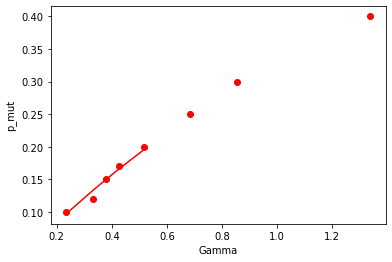

In [8]:
info_relation = scipy.optimize.curve_fit(relation,gammas[0:5],coeff[0:5])[0]
print(info_relation)
plt.plot(gammas,coeff, 'o', c='red')
plt.plot(gammas[0:5],relation(gammas[0:5],info_relation[0]), c = 'red')
plt.ylabel('p_mut')
plt.xlabel('Gamma')
plt.show()

### Correlation - Correlation amplitude

In [9]:
N = 1000000
N0 = 1
coeff2 = [0, N, int(1.10*N) ,int(1.25*N), int(1.50*N)]
subjects2 = [DNA_gen(N0,N,0.15,0.5, M = coeff2[i]) for i in range(len(coeff2))]
print(np.array(subjects2).shape)

Pmut:  0.15
[0, 0.25, 0.5, 0.75, 1]
Pmut:  0.15
[0, 0.25, 0.5, 0.75, 1]
Pmut:  0.15
[0, 0.25, 0.5, 0.75, 1]
Pmut:  0.15
[0, 0.25, 0.5, 0.75, 1]
Pmut:  0.15
[0, 0.25, 0.5, 0.75, 1]
(5, 1000000)


[0.6716759591495229, 0.09385076232667336, 0.07804765357260239, 0.055961408183053986, 0.03441447375181514]


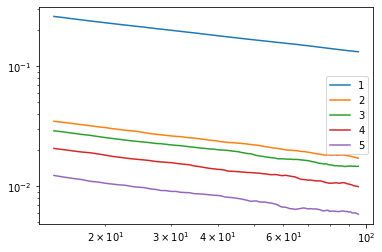

In [10]:
cs = []
count = 0
n = 5
m = 5
for s in  subjects2:
    count += 1
    change = {0:['A'], 1:['C'], 2:['T'], 3:['G']}
    dna = []
    for i in range(len(s)):
        dna.append(change[s[i]][0])
        
    alphabet = {'A':[0], 'C':[0], 'T':[0], 'G':[0]}
    for i in dna:
        alphabet[i][0] += 1
        
    r = np.linspace(10,100,100)
    cr = [Corr(s,int(ri),alphabet) for ri in r]
    cr = smooth(cr,10)
    

    try:
        c = scipy.optimize.curve_fit(scaling,r[n:-m],cr[n:-m])[0]
        cs.append(c[1])
        
        plt.plot(r[n:-m],cr[n:-m], label = '{}'.format(count))

    except:
        cs.append(-1)
    print('{}th Sequence'.format(count), end='\r' ,flush=True)    

print(cs)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()  

In [6]:
def rel_c(ampl_c,):
    return -np.log(ampl_c)/2*1.012226293705887

Offset:  1.012226293705887


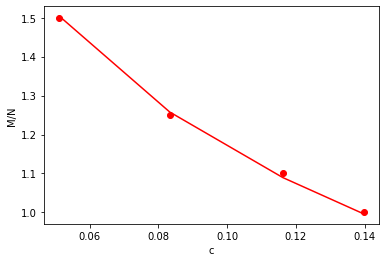

In [12]:
mn = np.array(coeff2[1:])/N
ampl_c = np.array(cs[1:])/cs[0]
plt.plot(ampl_c, mn,'o', c='red')

info_rel_c = scipy.optimize.curve_fit(rel_c,ampl_c, mn)[0]
plt.plot(ampl_c,rel_c(ampl_c,info_rel_c[0]), c = 'red')
print('Offset: ',info_rel_c[0])
plt.ylabel('M/N')
plt.xlabel('c')
plt.show()

### Select P-mut for Human and Neanderthal

In [13]:
exp_intr = np.fromfile('histo_10_100_intr.txt', sep = ",")
exp_depl = np.fromfile('histo_10_100_depl.txt', sep = ",")

mean_intr = np.mean(exp_intr)
mean_depl = np.mean(exp_depl)
print('G[Intr]:', mean_intr)
print('G[Depl]:', mean_depl)

G[Intr]: 0.45570531946288234
G[Depl]: 0.39954090257827257


In [14]:
p_human = relation(mean_depl, info_relation)
p_neanderthal = relation(mean_intr, info_relation)
print('H: ',p_human)
print('N: ',p_neanderthal)

H:  [0.15712493]
N:  [0.17598874]


In [58]:
c_intr = np.fromfile('c_intr.txt', sep = ",")
c_depl = np.fromfile('c_depl.txt', sep = ",")

In [59]:
c_intr_mean = np.mean(c_intr)
c_depl_mean = np.mean(c_depl)
print('C[Intr]:', c_intr_mean)
print('C[Depl]:', c_depl_mean)

C[Intr]: 0.06346758483847653
C[Depl]: 0.05350930434735322


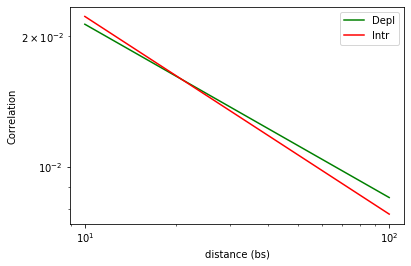

In [17]:
r = np.linspace(10,100,100)
plt.plot(r,scaling(r,mean_depl,c_depl_mean), c = 'green',label = 'Depl')
plt.plot(r,scaling(r,mean_intr,c_intr_mean), c = 'red',label = 'Intr')

plt.xlabel('distance (bs)')
plt.ylabel('Correlation')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.show()

### Sequence Generation

In [7]:
N = 2000000
N0 = 1

human = []
neanderthal = []

p_human = 0.15691407
p_neanderthal = 0.17575256

print('**Human**')
human = DNA_gen(N0,N,p_human,0.5)

print('**Neanderthal**')
neanderthal = DNA_gen(N0,N,p_neanderthal,0.5)

**Human**
Pmut:  0.15691407
[0, 0.25, 0.5, 0.75, 1]
**Neanderthal**
Pmut:  0.17575256
[0, 0.25, 0.5, 0.75, 1]


In [8]:
change = {0:['A'], 1:['C'], 2:['T'], 3:['G']}
N_DNA = []
H_DNA = []
for (i,j) in zip(human,neanderthal):
    H_DNA.append(change[i][0])
    N_DNA.append(change[j][0])
    
human_alphabet = {'A':[0], 'C':[0],'T':[0], 'G':[0]}
neanderthal_alphabet = {'A':[0], 'C':[0], 'T':[0], 'G':[0]}
for (i,j) in zip(H_DNA,N_DNA):
    human_alphabet[i][0] += 1
    neanderthal_alphabet[j][0] += 1
    
print('**Human**')
print(human_alphabet)
print('GC-content: ',(human_alphabet['C'][0]+human_alphabet['G'][0])/len(H_DNA))

print('**Neanderthal**')
print(neanderthal_alphabet)
print('GC-content: ',(neanderthal_alphabet['C'][0]+neanderthal_alphabet['G'][0])/len(N_DNA))

**Human**
{'A': [629772], 'C': [480073], 'T': [401918], 'G': [488237]}
GC-content:  0.484155
**Neanderthal**
{'A': [461916], 'C': [642229], 'T': [448462], 'G': [447393]}
GC-content:  0.544811


G[H]: 0.3995297884422618
C[H]: 0.7074279164642465
G[N]: 0.4583472995106024
C[N]: 0.7132705190447504


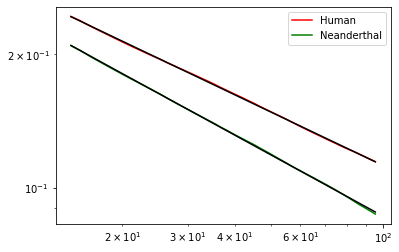

In [9]:
r = np.linspace(10,100,100)
n = 5
m = 5

cr_H = [Corr(human,int(ri),human_alphabet) for ri in r]
cr_H = smooth(cr_H,10)

cr_N = [Corr(neanderthal,int(ri),neanderthal_alphabet) for ri in r]
cr_N = smooth(cr_N,10)
 

gamma_H = scipy.optimize.curve_fit(scaling,r[n:-m],cr_H[n:-m])[0]
gamma_N = scipy.optimize.curve_fit(scaling,r[n:-m],cr_N[n:-m])[0]
        
plt.plot(r[n:-m],cr_H[n:-m], c = 'red', label = 'Human')
plt.plot(r[n:-m],scaling(r[n:-m],gamma_H[0],gamma_H[1]), c = 'black')

plt.plot(r[n:-m],cr_N[n:-m], c = 'green', label = 'Neanderthal')
plt.plot(r[n:-m],scaling(r[n:-m],gamma_N[0],gamma_N[1]), c = 'black')

print('G[H]:',gamma_H[0])
print('C[H]:',gamma_H[1])
print('G[N]:',gamma_N[0])
print('C[N]:',gamma_N[1])

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

In [14]:
mean_intr = 0.45570531946288234
mean_depl = 0.39954090257827257

In [16]:
N = 2000000
c_depl_mean = 0.05350930434735322
c_intr_mean = 0.06346758483847653
div_H = c_depl_mean/gamma_H[1]
div_N = c_intr_mean/gamma_N[1]

M_H = int(rel_c(div_H)*N)
M_N = int(rel_c(div_N)*N)
print(M_H)
print(M_N)

2613345
2448910


### Sequence Generation - Similar Correlation Amplitude

In [22]:
N = 2000000
N0 = 1

print('**Human**')
human2 = DNA_gen(N0,N,p_human,0.5, M = M_H)

print('**Neanderthal**')
neanderthal2 = DNA_gen(N0,N,p_neanderthal,0.5, M = M_N)

**Human**
Pmut:  0.15691407
[0, 0.25, 0.5, 0.75, 1]
**Neanderthal**
Pmut:  0.17575256
[0, 0.25, 0.5, 0.75, 1]


In [23]:
change = {0:['A'], 1:['C'], 2:['T'], 3:['G']}
N_DNA2 = []
H_DNA2 = []
for (i,j) in zip(human2,neanderthal2):
    H_DNA2.append(change[i][0])
    N_DNA2.append(change[j][0])
    
human_alphabet2 = {'A':[0], 'C':[0],'T':[0], 'G':[0]}
neanderthal_alphabet2 = {'A':[0], 'C':[0], 'T':[0], 'G':[0]}
for (i,j) in zip(H_DNA2,N_DNA2):
    human_alphabet2[i][0] += 1
    neanderthal_alphabet2[j][0] += 1
    
print('**Human**')
print(human_alphabet2)
print('GC-content: ',(human_alphabet2['C'][0]+human_alphabet2['G'][0])/len(H_DNA2))

print('**Neanderthal**')
print(neanderthal_alphabet2)
print('GC-content: ',(neanderthal_alphabet2['C'][0]+neanderthal_alphabet2['G'][0])/len(N_DNA2))

**Human**
{'A': [474762], 'C': [541918], 'T': [483119], 'G': [500201]}
GC-content:  0.5210595
**Neanderthal**
{'A': [533638], 'C': [489000], 'T': [485714], 'G': [491648]}
GC-content:  0.490324


In [24]:
r = np.linspace(10,100,100)
n = 5
m = 5

cr_H2 = [Corr(human2,int(ri),human_alphabet2) for ri in r]
cr_H2 = smooth(cr_H2,10)

cr_N2 = [Corr(neanderthal2,int(ri),neanderthal_alphabet2) for ri in r]
cr_N2 = smooth(cr_N2,10)
 

gamma_H2 = scipy.optimize.curve_fit(scaling,r[n:-m],cr_H2[n:-m])[0]
gamma_N2 = scipy.optimize.curve_fit(scaling,r[n:-m],cr_N2[n:-m])[0]

G[H]: 0.400363603690215
C[H]: 0.05173005280654302 

G[N]: 0.46201868827543957
C[N]: 0.06243140730579273 

G[Intr]: 0.45570531946288234
C[Intr]: 0.06346758483847653 

G[Depl]: 0.39954090257827257
C[Depl]: 0.05350930434735322


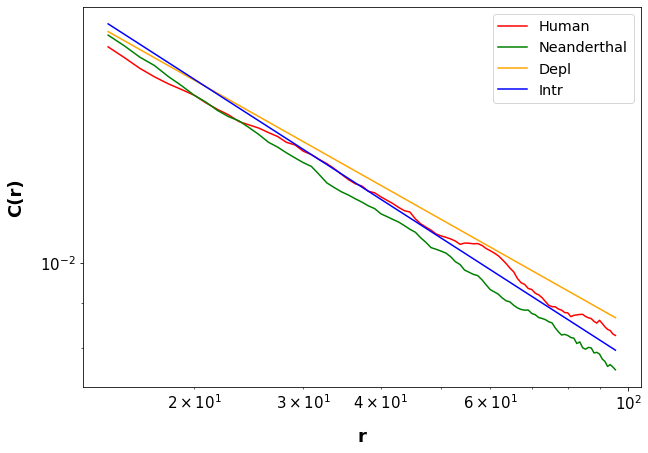

In [25]:
plt.figure(figsize = (10,7))
plt.xlabel('r', fontsize = 18, labelpad = 15, weight = 'semibold')
plt.ylabel('C(r)', fontsize = 18, labelpad = 15, weight = 'semibold')


plt.plot(r[n:-m],cr_H2[n:-m], c = 'red', label = 'Human')
plt.plot(r[n:-m],cr_N2[n:-m], c = 'green', label = 'Neanderthal')

plt.plot(r[n:-m],scaling(r[n:-m],mean_depl,c_depl_mean), c = 'orange',label = 'Depl')
plt.plot(r[n:-m],scaling(r[n:-m],mean_intr,c_intr_mean), c = 'blue',label = 'Intr')

print('G[H]:',gamma_H2[0])
print('C[H]:',gamma_H2[1],'\n')
print('G[N]:',gamma_N2[0])
print('C[N]:',gamma_N2[1],'\n')

print('G[Intr]:', mean_intr)
print('C[Intr]:', c_intr_mean,'\n')
print('G[Depl]:', mean_depl)
print('C[Depl]:', c_depl_mean)

plt.yscale('log')
plt.xscale('log')
plt.tick_params(labelsize=15,  which='both')
plt.legend(fontsize = 'x-large')
plt.show()

In [26]:
string = ''
with open('human_4bases_long.txt', mode='w') as f:
    f.write(string.join(H_DNA2))
    f.close()
string = ''
with open('neanderthal_4bases_long.txt', mode='w') as f:
    f.write(string.join(N_DNA2))
    f.close()

### Without Kmers

In [60]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy
from scipy import signal

In [61]:
with open('human_4bases_0.txt', mode='r') as f:
    H_DNA = f.read().rstrip('\n')
    f.close()
with open('neanderthal_4bases_0.txt', mode='r') as f:
    N_DNA = f.read().rstrip('\n')
    f.close()

In [62]:
H_DNA = [i for i in H_DNA]
N_DNA = [i for i in N_DNA]

In [63]:
human_alphabet = {'A':[0], 'C':[0],'T':[0], 'G':[0]}
neanderthal_alphabet = {'A':[0], 'C':[0], 'T':[0], 'G':[0]}
for (i,j) in zip(H_DNA,N_DNA):
    human_alphabet[i][0] += 1
    neanderthal_alphabet[j][0] += 1
    
print('**Human**')
print(human_alphabet)
print('GC-content: ',(human_alphabet['C'][0]+human_alphabet['G'][0])/len(H_DNA))

print('**Neanderthal**')
print(neanderthal_alphabet)
print('GC-content: ',(neanderthal_alphabet['C'][0]+neanderthal_alphabet['G'][0])/len(N_DNA))

**Human**
{'A': [2466082], 'C': [2541652], 'T': [2482468], 'G': [2509798]}
GC-content:  0.505145
**Neanderthal**
{'A': [2412454], 'C': [2586730], 'T': [2565766], 'G': [2435050]}
GC-content:  0.502178


In [64]:
sentence_length= 200
word_length = 10

H_DNA = np.array(H_DNA[0:(len(H_DNA)//sentence_length)*sentence_length])
N_DNA = np.array(N_DNA[0:(len(N_DNA)//sentence_length)*sentence_length])

#divide in sentences
H_DNA_s = np.array(np.split(H_DNA, len(H_DNA)//sentence_length))
N_DNA_s = np.array(np.split(N_DNA, len(N_DNA)//sentence_length))

#divide in words
H_DNA_w = np.array(np.split(H_DNA_s, sentence_length//word_length, axis=1  ))
N_DNA_w = np.array(np.split(N_DNA_s, sentence_length//word_length , axis=1 ))

print(H_DNA_w.shape)
print(N_DNA_w.shape)
print("words,sentences,letters")

(20, 50000, 10)
(20, 50000, 10)
words,sentences,letters


intr_texts = [' '.join(getKmers(i, kmer)) for i in intr_seqs]
depl_texts = [' '.join(getKmers(i, kmer)) for i in depl_seqs]

In [65]:
#make words strings.
Human_DNA = np.array([[''.join(H_DNA_w[i,j]) for i in range(H_DNA_w.shape[0]) ]for 
                  j in range(H_DNA_w.shape[1])])
#make words strings.
Neanderthal_DNA = np.array([[''.join(N_DNA_w[i,j]) for i in range(N_DNA_w.shape[0]) ]for 
                  j in range(N_DNA_w.shape[1])])

depl_texts = [' '.join(Human_DNA[i,:]) for i in range(Human_DNA.shape[0])]
intr_texts = [' '.join(Neanderthal_DNA[i,:]) for i in range(Neanderthal_DNA.shape[0])]

In [66]:
merge_texts = intr_texts + depl_texts
print(len(merge_texts))
labels = list(np.ones(len(intr_texts))) + list(np.zeros(len(depl_texts)))
print(len(labels))

100000
100000


In [67]:
import tensorflow as tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout, concatenate, SpatialDropout1D
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, LSTM, Bidirectional, Attention
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer

if tensorflow.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tensorflow.test.gpu_device_name()))
else:
    print("Please install GPU version of tensorflow")

Default GPU Device: /device:GPU:0


In [68]:
import warnings
warnings.filterwarnings('ignore')

tokenizer = Tokenizer()
tokenizer.fit_on_texts(merge_texts)

encoded_docs = tokenizer.texts_to_sequences(merge_texts)
max_length = max([len(s.split()) for s in merge_texts])
X = pad_sequences(encoded_docs, maxlen = max_length, padding = 'post')

print(X)
print('\n')
print(X.shape)

[[227057  27634  45932 ...  34925 404638 136246]
 [227059 136247   4268 ...   5539  15199 227061]
 [  3393  45936   1628 ...    353 136249  89223]
 ...
 [197485   1673 320285 ...  21734 135853 403451]
 [ 74967 233967 112407 ...     12 711933 711934]
 [109141 401116 134096 ... 711936 257738 257556]]


(100000, 20)


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.20, shuffle = True)

In [70]:
print(X_train.shape)
print(X_test.shape)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

(80000, 20)
(20000, 20)


In [71]:
max_length = max([len(s.split()) for s in merge_texts])
print(max_length)

20


In [72]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

711937


In [73]:
model = Sequential()
d = 10
model.add(Embedding(vocab_size, d)) 
model.add(Bidirectional(LSTM(int(d/2))))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor = 'val_acc', verbose = 1, 
                             save_best_only = True, mode = 'max')
print(model.summary())

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

epochs = 5

model.fit(X_train, y_train, 
                    epochs = epochs, verbose = 2, validation_split = 0.2, shuffle = True)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 10)          7119370   
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 10)                640       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 11        
Total params: 7,120,131
Trainable params: 7,120,131
Non-trainable params: 0
_________________________________________________________________
None
Train on 64000 samples, validate on 16000 samples
Epoch 1/5
64000/64000 - 87s - loss: 0.6863 - accuracy: 0.5398 - val_loss: 0.6774 - val_accuracy: 0.5694
Epoch 2/5
64000/64000 - 80s - loss: 0.3883 - accuracy: 0.8311 - val_loss: 0.8809 -

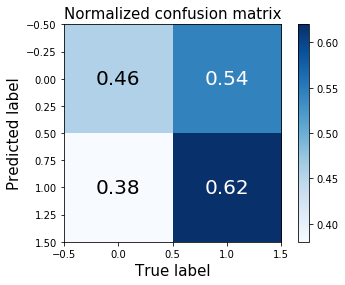

In [74]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

predicted_labels = model.predict(X_test)
cm = confusion_matrix(y_test, [np.round(i[0]) for i in predicted_labels])
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

plt.imshow(cm, cmap = plt.cm.Blues)
plt.title('Normalized confusion matrix', fontsize = 15)
plt.colorbar()
plt.xlabel('True label', fontsize = 15)
plt.ylabel('Predicted label', fontsize = 15)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20,
             color='white' if cm[i, j] > 0.5 else 'black')
plt.show()

### With Kmers

In [75]:
with open('human_4bases_0.txt', mode='r') as f:
    H_DNA = f.read().rstrip('\n')
    f.close()
with open('neanderthal_4bases_0.txt', mode='r') as f:
    N_DNA = f.read().rstrip('\n')
    f.close()

In [76]:
H_DNA = [i for i in H_DNA]
N_DNA = [i for i in N_DNA]

In [77]:
human_alphabet = {'A':[0], 'C':[0],'T':[0], 'G':[0]}
neanderthal_alphabet = {'A':[0], 'C':[0], 'T':[0], 'G':[0]}
for (i,j) in zip(H_DNA,N_DNA):
    human_alphabet[i][0] += 1
    neanderthal_alphabet[j][0] += 1
    
print('**Human**')
print(human_alphabet)
print('GC-content: ',(human_alphabet['C'][0]+human_alphabet['G'][0])/len(H_DNA))

print('**Neanderthal**')
print(neanderthal_alphabet)
print('GC-content: ',(neanderthal_alphabet['C'][0]+neanderthal_alphabet['G'][0])/len(N_DNA))

**Human**
{'A': [2466082], 'C': [2541652], 'T': [2482468], 'G': [2509798]}
GC-content:  0.505145
**Neanderthal**
{'A': [2412454], 'C': [2586730], 'T': [2565766], 'G': [2435050]}
GC-content:  0.502178


In [78]:
sentence_length= 200

H_DNA = np.array(H_DNA[0:(len(H_DNA)//sentence_length)*sentence_length])
N_DNA = np.array(N_DNA[0:(len(N_DNA)//sentence_length)*sentence_length])

#divide in sentences
H_DNA_s= np.array(np.split(H_DNA, len(H_DNA)//sentence_length))
N_DNA_s= np.array(np.split(N_DNA, len(N_DNA)//sentence_length))

H_DNA_s = [''.join(i) for i in H_DNA_s]
N_DNA_s = [''.join(i) for i in N_DNA_s]

In [79]:
def getKmers(sequence, size):
    return [sequence[x:x+size] for x in range(len(sequence) - size + 1)]

kmer = [10]
for k in kmer:
    print('KMER: ', k)
    intr_texts = [' '.join(map(str, (getKmers(i, k)))) for i in N_DNA_s]
    depl_texts = [' '.join(map(str, (getKmers(i, k)))) for i in H_DNA_s]

KMER:  10


In [80]:
merge_texts = intr_texts + depl_texts

tokenizer = Tokenizer()
tokenizer.fit_on_texts(merge_texts)
#X = tokenizer.texts_to_matrix(merge_texts, mode = 'freq')

encoded_docs = tokenizer.texts_to_sequences(merge_texts)
max_length = max([len(s.split()) for s in merge_texts])
X = pad_sequences(encoded_docs, maxlen = max_length, padding = 'post')
labels = list(np.ones(len(intr_texts))) + list(np.zeros(len(depl_texts)))
print(len(X))
print(len(labels))
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.20, random_state = 42)

20000
20000


In [81]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
vocab_size = len(tokenizer.word_index) + 1
vocab_size

1047277

In [82]:
X_train[0]

array([  32451,  360924,  224412,  143928,  533799,  453770,  232738,
         86812,  317671,  101280,  169216,  136815,   46084,   27783,
        160341,  731122,  533980,  650758,  297668,  240810,  133981,
        227708,  152521,   24942,   49561,   58554,  119323,   81765,
         68222,   87524,   73805,  108581,  208008,  457692,  343564,
        239891,  894165, 1009915,  644202,  760098,  870391,  470329,
        976203,  567806,  204490,  516056,  437207,  451633,  870392,
        526826,  455556,  135611,   51388,   53771,   99378,   18602,
          3489,     761,     985,    5044,    8013,   32591,  149683,
        442381,  122266,  126469,  209437,   62206,   42394,    6654,
           990,    8088,   22362,   13295,   16242,    4476,    1780,
          1205,    2358,    3840,    1247,    5568,   12700,   13948,
         15232,   89100,  257881,  263393,  265726,  241201,  345236,
        266546,  119903,  374610,  304108,  429475,  130647,   79456,
        211233,  141

In [83]:
d = 10
model = Sequential()
model.add(Embedding(vocab_size, d)) #dropout = 0.2 #input_length = max_length
model.add(Bidirectional(LSTM(int(10)))) #dropout = 0.2, recurrent_dropout = 0.2)
model.add(Dense(1, activation = 'sigmoid'))

epochs = 5
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
#checkpoint = ModelCheckpoint("weights.best.hdf5", monitor = 'val_acc', verbose = 1, 
#                             save_best_only = True, mode = 'max')

print(model.summary())

history = model.fit(X_train, y_train, 
                    epochs = epochs, verbose = 2, validation_split = 0.2, batch_size = 32, shuffle = True, 
#                    callbacks = [checkpoint]
                   )

predicted_labels = model.predict(X_test)
cm = confusion_matrix(y_test, [np.round(i[0]) for i in predicted_labels])
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 10)          10472770  
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 20)                1680      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 21        
Total params: 10,474,471
Trainable params: 10,474,471
Non-trainable params: 0
_________________________________________________________________
None
Train on 12800 samples, validate on 3200 samples
Epoch 1/5
12800/12800 - 92s - loss: 0.6933 - accuracy: 0.4980 - val_loss: 0.6930 - val_accuracy: 0.5138
Epoch 2/5
12800/12800 - 86s - loss: 0.5421 - accuracy: 0.7898 - val_loss: 0.7076 - val_accuracy: 0.5669
Epoch 3/5
12800/12800 - 87s - loss: 0.0648 - accuracy: 0.9893 - val_loss: 1.0249 - val_accuracy: 0.5675
Epoch

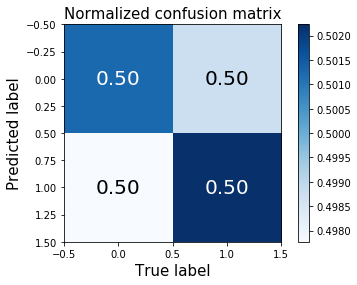

In [84]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

predicted_labels = model.predict(X_test)
cm = confusion_matrix(y_test, [np.round(i[0]) for i in predicted_labels])
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

plt.imshow(cm, cmap = plt.cm.Blues)
plt.title('Normalized confusion matrix', fontsize = 15)
plt.colorbar()
plt.xlabel('True label', fontsize = 15)
plt.ylabel('Predicted label', fontsize = 15)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20,
             color='white' if cm[i, j] > 0.5 else 'black')
plt.show()